# Thomas Koutsidis

## Assignment 4

In [1]:
import pandas as pd

In [2]:
csv_df = pd.read_csv("employees.csv")

### 1. 

In [3]:
categories = pd.Categorical(csv_df['Team'])
teams = categories.value_counts()
print(teams)

Business Development    101
Client Services         106
Distribution             90
Engineering              92
Finance                 102
Human Resources          91
Legal                    88
Marketing                98
Product                  95
Sales                    94
dtype: int64


### 2.

In [4]:
teams_salaries = csv_df.groupby('Team')['Salary'].transform('mean')
csv_df['Salary'] = teams_salaries.round(2)

In [5]:
csv_df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,90435.59,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,NaN,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,92219.48,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,92219.48,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,88224.42,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,88500.47,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,92219.48,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,88665.51,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,91866.32,11.985,False,Business Development


### 3.

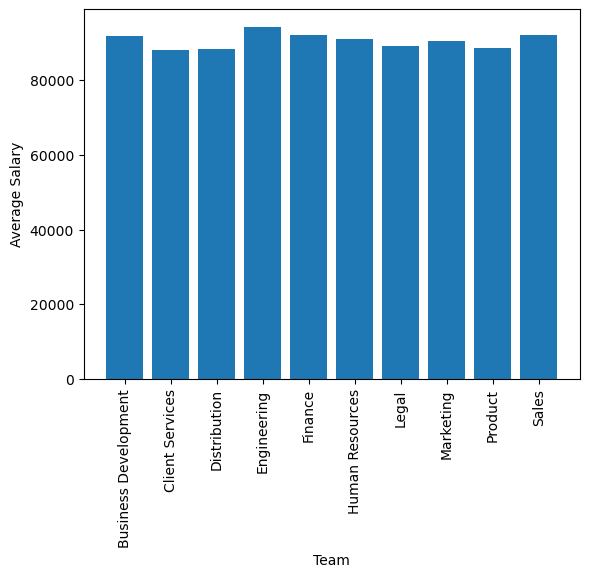

In [6]:
import matplotlib.pyplot as plt

avg_sal = csv_df.groupby('Team')['Salary'].mean()

plt.bar(avg_sal.index, avg_sal)
plt.xticks(rotation = 90)
plt.xlabel('Team')
plt.ylabel('Average Salary')
plt.show()

# Resources used:
# https://stackabuse.com/rotate-axis-labels-in-matplotlib/

### 4.

In [7]:
csv_df['Start Date'] = pd.to_datetime(csv_df['Start Date'])

# Resources used:
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

In [8]:
csv_df['Start Date']

0     1993-08-06
1     1996-03-31
2     1993-04-23
3     2005-03-04
4     1998-01-24
         ...    
995   2014-11-23
996   1984-01-31
997   2013-05-20
998   2013-04-20
999   2012-05-15
Name: Start Date, Length: 1000, dtype: datetime64[ns]

### 5.

In [9]:
csv_df.set_index('Start Date', inplace = True)

bonuses = pd.Series(csv_df['Bonus %'])

In [10]:
bonuses

Start Date
1993-08-06     6.945
1996-03-31     4.170
1993-04-23    11.858
2005-03-04     9.340
1998-01-24     1.389
               ...  
2014-11-23    16.655
1984-01-31    19.675
2013-05-20     1.421
2013-04-20    11.985
2012-05-15    10.169
Name: Bonus %, Length: 1000, dtype: float64

### 6.

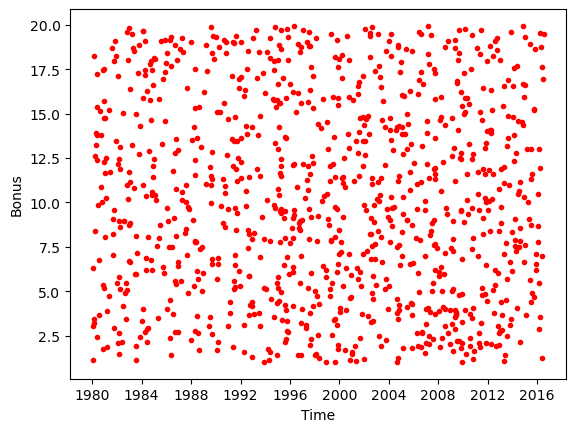

In [11]:
plt.scatter(bonuses.index, bonuses, color = 'red', marker = '.')
plt.xlabel('Time')
plt.ylabel('Bonus')
plt.show()

# Resources used:
# https://e2eml.school/matplotlib_points.html
# https://matplotlib.org/stable/api/markers_api.html

### 7.

In [12]:
bonuses_08 = bonuses[bonuses.index < '2008-01-01']

In [13]:
bonuses_08

Start Date
1993-08-06     6.945
1996-03-31     4.170
1993-04-23    11.858
2005-03-04     9.340
1998-01-24     1.389
               ...  
1991-02-10     3.794
1987-07-24    10.982
2002-08-25    11.051
1997-05-15    19.040
1984-01-31    19.675
Name: Bonus %, Length: 753, dtype: float64

### 8.

In [14]:
downsample = bonuses.resample('3M').mean()

In [15]:
downsample

Start Date
1980-01-31     3.507000
1980-04-30    10.426857
1980-07-31    10.192750
1980-10-31    12.474500
1981-01-31    11.314000
                ...    
2015-07-31    10.327500
2015-10-31    10.002500
2016-01-31     9.347143
2016-04-30     9.394667
2016-07-31    13.511167
Freq: 3M, Name: Bonus %, Length: 147, dtype: float64